University Trial 

# Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.metrics import log_loss,roc_auc_score,f1_score,recall_score,roc_curve
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,fbeta_score
from sklearn.metrics import precision_score 
import warnings as wr
wr.filterwarnings('ignore')
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_squared_error
from keras.layers import LSTM, Dense

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
import os 
import signal

In [3]:
#data loading 
# discarding first two rows time and sampling rate dtaframe[2:]# uploaded dataset on notebook home first
bvp = pd.read_csv(filepath_or_buffer="BVP.csv", header=None)[2:]
acc = pd.read_csv(filepath_or_buffer="ACC.csv", header=None)[2:]
hr = pd.read_csv(filepath_or_buffer="HR.csv", header=None)[2:]
eda = pd.read_csv(filepath_or_buffer="EDA.csv", header=None)[2:]
temp = pd.read_csv(filepath_or_buffer="TEMP.csv", header=None)[2:]

# Respiratory Rate

Respiratory extarcted from the bvp file. Initially, it renames the first column of a DataFrame (bvp) to 'R'. After renaming, it saves this DataFrame to a CSV file named 'data1.csv'. Next, a function named pull_out_values is defined to extract specific values from a given column of a CSV file based on a specified range (between lower_bound and upper_bound). This function works by first reading the CSV file into a Pandas DataFrame. It then uses the loc method to filter rows where the values in the given column fall within the specified range. After defining the function, it is called using an example CSV file named 'BVP1.csv', targeting the 'R' column and looking for values between 8.00 and 18.00. The extracted values are then printed out.

Extracted values from 'R' column where 'R' is between 8.0 and 18.0:
[ 8.31  9.14 10.09 ... 17.4  10.68 17.51]
respiratory rate
        0
0    8.31
1    9.14
2   10.09
3   11.04
4   11.88
..    ...
95  11.97
96  16.95
97  14.68
98  13.22
99  12.33

[100 rows x 1 columns]


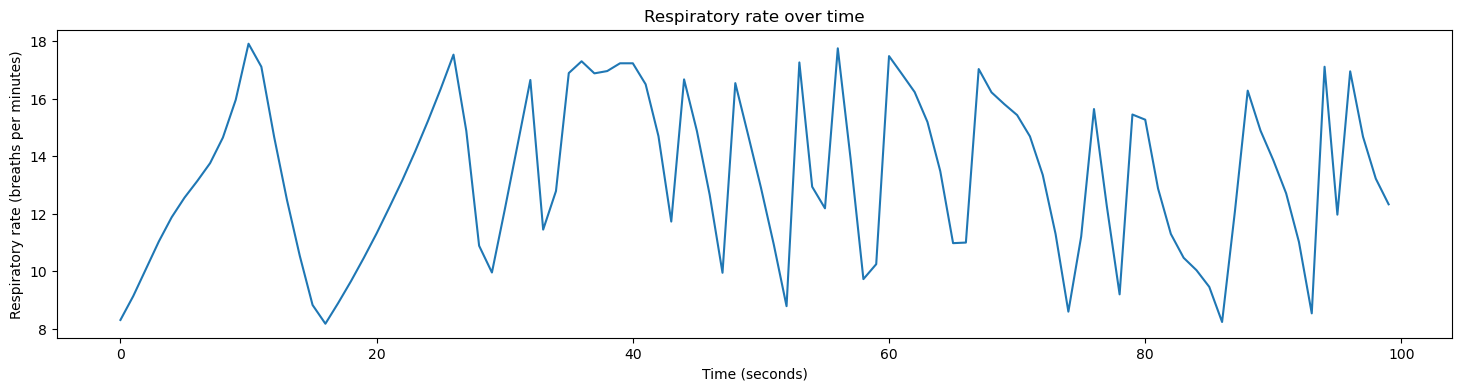

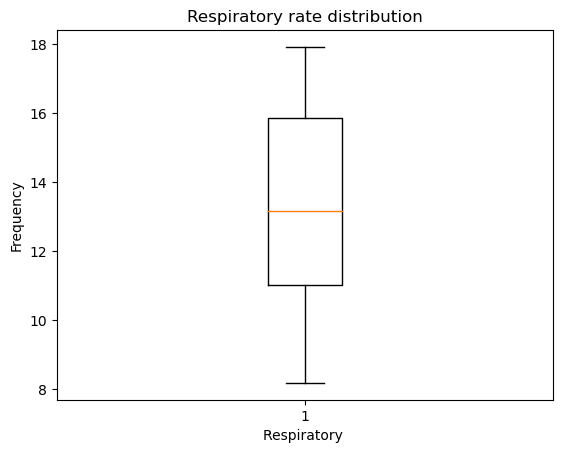

In [4]:
bvp.rename({0:'R'},inplace=True, axis=1)
csv_file_path = 'data1.csv'
bvp.to_csv(csv_file_path, index=False)
def pull_out_values(csv_file_path, column_name, lower_bound, upper_bound):
    # Read the CSV file into a Pandas DataFrame
    df1 = pd.read_csv(csv_file_path)

    # Extract the values from the specified column based on the condition
    values = df1.loc[(df1[column_name] >= lower_bound) & (df1[column_name] <= upper_bound)][column_name].values

    return values

# Example usage
csv_file_path = 'BVP1.csv'
column_name_to_extract = 'R'
lower_bound = 8.00
upper_bound = 18.00
extracted_values = pull_out_values(csv_file_path, column_name_to_extract, lower_bound, upper_bound)

print(f"Extracted values from '{column_name_to_extract}' column where '{column_name_to_extract}' is between {lower_bound} and {upper_bound}:")
print(extracted_values)
########
df1= pd.DataFrame(extracted_values)
df1=df1.iloc[:100,]

print("respiratory rate")
print(df1)

############
# Set the figure size to 18 inches by 4 inches
plt.figure(figsize=(18, 4))

# Create a line plot
plt.plot(df1)

# Add labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Respiratory rate (breaths per minutes)")
plt.title("Respiratory rate over time")

# Show the plot
plt.show()

# Create box plot
plt.boxplot(df1)

# Add labels and title
plt.xlabel('Respiratory ')
plt.ylabel('Frequency')
plt.title('Respiratory rate distribution')

# Show the plot
plt.show()



# Heart rate

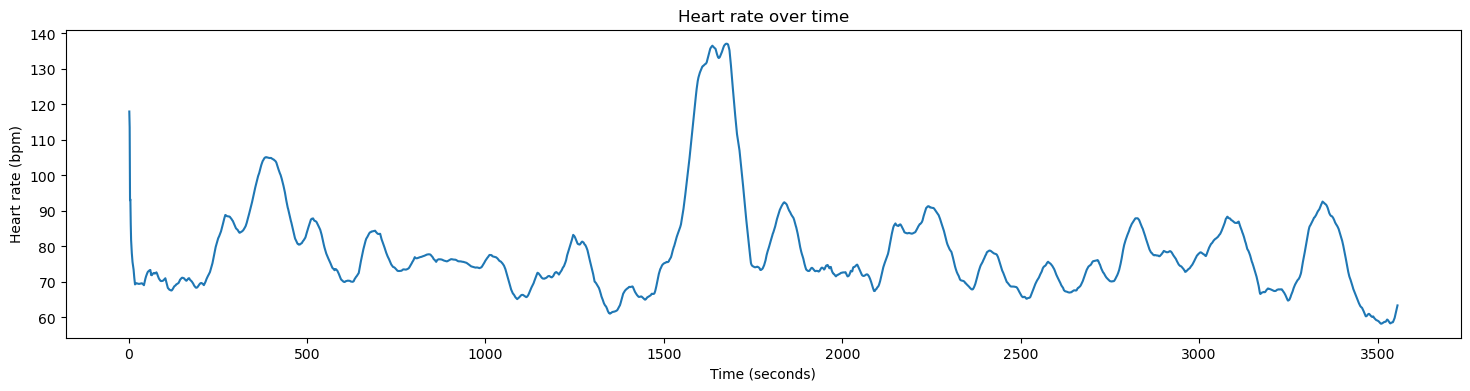

In [5]:
# Set the figure size to 8 inches by 4 inches
plt.figure(figsize=(18, 4))

# Create a line plot
plt.plot(hr)

# Add labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Heart rate (bpm)")
plt.title("Heart rate over time")

# Show the plot
plt.show()

# EDA

In [6]:
pip install scipy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
from scipy import signal

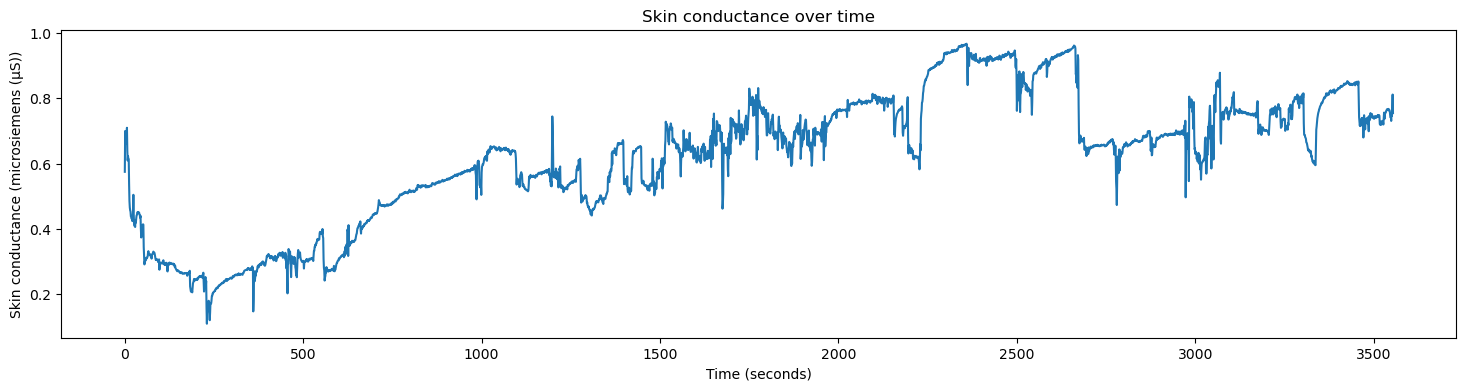

In [8]:
# resample temperature signal to match the dimension of the heart rate
r_eda = signal.resample(eda[: len(hr) * 4], len(hr))

# Set the figure size to 8 inches by 4 inches
plt.figure(figsize=(18, 4))

# Create a line plot
plt.plot(r_eda)

# Add labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Skin conductance (microsiemens (μS))")
plt.title("Skin conductance over time")

# Show the plot
plt.show()

# Temperature

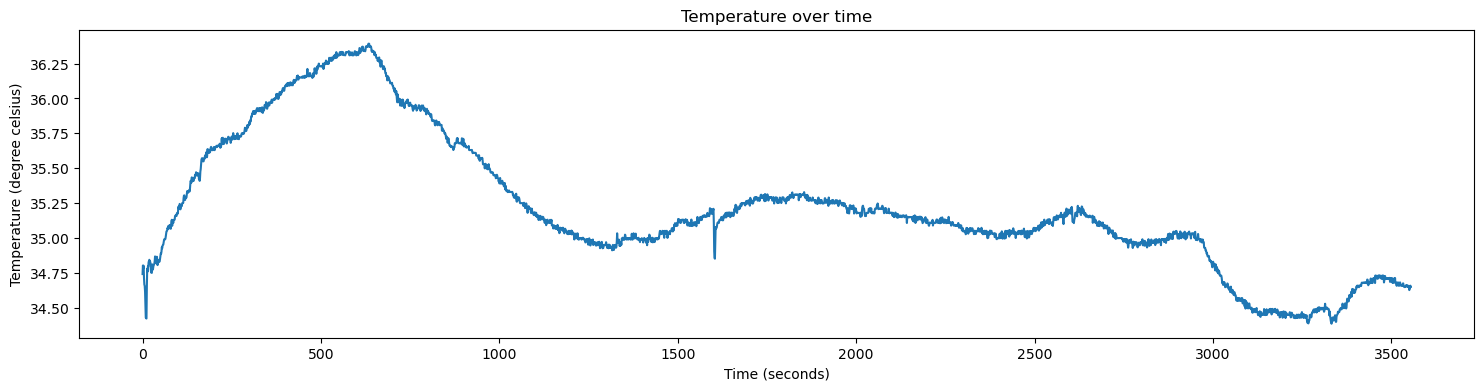

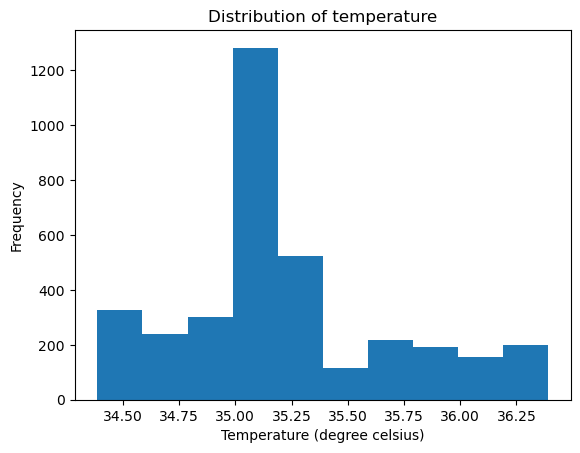

In [9]:
# resample temperature signal to match the dimension of the heart rate
r_temp = signal.resample(temp[: len(hr) * 3], len(hr))

# Set the figure size to 8 inches by 4 inches
plt.figure(figsize=(18, 4))

# Create a line plot
plt.plot(r_temp)

# Add labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Temperature (degree celsius)")
plt.title("Temperature over time")

# Show the plot
plt.show()
# Create a histogram with 10 bins
plt.hist(r_temp, bins=10)

# Add labels and title
plt.xlabel("Temperature (degree celsius)")
plt.ylabel("Frequency")
plt.title("Distribution of temperature")

# Show the plot
plt.show()

In [10]:
utime = pd.read_csv(filepath_or_buffer="tags_S02.csv", header=None)

# Convert Unix timestamp to datetime format
for i in range(len(utime)):
    utime['datetime'] = pd.to_datetime(utime[0], unit='s')

# Print the updated dataframe
print(utime)

            0            datetime
0  1644228196 2022-02-07 10:03:16
1  1644228572 2022-02-07 10:09:32
2  1644228844 2022-02-07 10:14:04
3  1644229499 2022-02-07 10:24:59
4  1644229801 2022-02-07 10:30:01
5  1644229931 2022-02-07 10:32:11
6  1644230238 2022-02-07 10:37:18
7  1644230562 2022-02-07 10:42:42
8  1644231123 2022-02-07 10:52:03


# Data Merging 

In [11]:
main_dir= "E:\\Stress-Predict-Dataset-main\\Raw_data"
csv_files = ["HR.csv", "EDA.csv", "TEMP.csv","BVP.csv"]
merged_df = pd.DataFrame()
for i in range(1, 36):
   
    subfolder = "S{:02d}".format(i)
    # Define the path to the current subfolder
    subfolder_path = os.path.join(main_dir, subfolder)
    # Create a new dataframe to store the merged data for the current subfolder
    subfolder_df = pd.DataFrame()
# Loop over the CSV files and read them into dataframes
for csv_file in csv_files:
    # Define the path to the current CSV file
    csv_path = os.path.join(subfolder_path, csv_file)
    # Read the CSV file into a dataframe
    df = pd.read_csv(csv_path, header=None)
# Create a DataFrame based on a resampling operation
    df = pd.DataFrame(
        signal.resample(     # Taking a subset of the dataframe starting from the 3rd element 
        # up to (number of rows in "HR.csv" * 4)
            df[2: len(pd.read_csv(os.path.join(subfolder_path, "HR.csv"))) * 4],# Defining the number of desired samples after resampling.
        # This is set to be (number of rows in "HR.csv" - 2)
            len(pd.read_csv(os.path.join(subfolder_path, "HR.csv"))) - 2,
        )
    )
    df.columns = [csv_file]
    # Merge the dataframe with the current subfolder dataframe
    subfolder_df = pd.concat([subfolder_df, df], axis=1)

# Add a new column to the merged dataframe to indicate the subfolder ID
subfolder_df["Participant"] = i
# Append the merged dataframe for the current subfolder to the overall merged dataframe
merged_df = pd.concat([merged_df, subfolder_df], axis=0)

# Save the merged dataframe to a new CSV file
merged_df.to_csv("merged_data.csv", index=False)
print(merged_df)


          HR.csv   EDA.csv   TEMP.csv    BVP.csv  Participant
0     109.000000  0.341240  33.157728  12.796972           35
1     108.992710  0.657300  33.860074  -2.845241           35
2      89.995928  0.509193  33.667783   1.487958           35
3      85.495653  0.563867  33.815960  -0.949521           35
4      82.599513  0.535407  33.719539   0.624920           35
...          ...       ...        ...        ...          ...
3507   65.365031  0.220761  32.220504  13.880544           35
3508   65.425107  0.244023  32.263194  36.726387           35
3509   65.444431  0.210796  32.185664  41.985777           35
3510   65.476209  0.253655  32.294394  32.951174           35
3511   65.492358  0.179025  32.084219  34.535729           35

[3512 rows x 5 columns]


# Data Preprocessing

In [12]:
merged_df

,HR.csv,EDA.csv,TEMP.csv,BVP.csv,Participant
0,109.000000,0.341240,33.157728,12.796972,35
1,108.992710,0.657300,33.860074,-2.845241,35
2,89.995928,0.509193,33.667783,1.487958,35
3,85.495653,0.563867,33.815960,-0.949521,35
4,82.599513,0.535407,33.719539,0.624920,35
...,...,...,...,...,...
3507,65.365031,0.220761,32.220504,13.880544,35
3508,65.425107,0.244023,32.263194,36.726387,35
3509,65.444431,0.210796,32.185664,41.985777,35
3510,65.476209,0.253655,32.294394,32.951174,35


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'merged_df' is  DataFrame containing columns: 'HR', 'RR', 'EDA', 'TEMP', 'Participant'
# Replace this with  actual data loading or creation

# Remove any rows with missing values
merged_df.dropna(inplace=True)

# Standardize the data using the StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_df[['HR.csv', 'BVP.csv', 'EDA.csv', 'TEMP.csv']])  # Selecting relevant columns
scaled_df = pd.DataFrame(scaled_data, columns=['HR.csv', 'BVP.csv', 'EDA.csv', 'TEMP.csv'])

# Label the data with a binary classification based on different conditions
def label_data(row):
    if row["HR.csv"] > 1.0 and row["BVP.csv"] > 0.5:
        return 1
    elif row["EDA.csv"] > 0.8 or row["TEMP.csv"] > 1.5:
        return 1
    else:
        return 0

scaled_df["Label"] = scaled_df.apply(label_data, axis=1)

# Adding Participant information back to the scaled and labeled DataFrame
scaled_df["Participant"] = merged_df["Participant"]

# Now 'scaled_df' contains the standardized and labeled data


In [14]:

# Save the merged dataframe to a new CSV file
scaled_df.to_csv("scaled_data.csv", index=False)
print(scaled_df)

        HR.csv   BVP.csv   EDA.csv  TEMP.csv  Label  Participant
0     3.407213  0.098120 -0.967549  1.305783      0           35
1     3.406476 -0.022192 -0.153063  2.606911      1           35
2     1.486082  0.011136 -0.534733  2.250683      1           35
3     1.031147 -0.007611 -0.393840  2.525188      1           35
4     0.738375  0.004498 -0.467180  2.346563      1           35
...        ...       ...       ...       ...    ...          ...
3507 -1.003867  0.106454 -1.278024 -0.430466      0           35
3508 -0.997794  0.282174 -1.218079 -0.351381      0           35
3509 -0.995840  0.322626 -1.303703 -0.495009      0           35
3510 -0.992628  0.253136 -1.193255 -0.293583      0           35
3511 -0.990995  0.265324 -1.385578 -0.682941      0           35

[3512 rows x 6 columns]


Text(0, 0.5, 'Temparature')

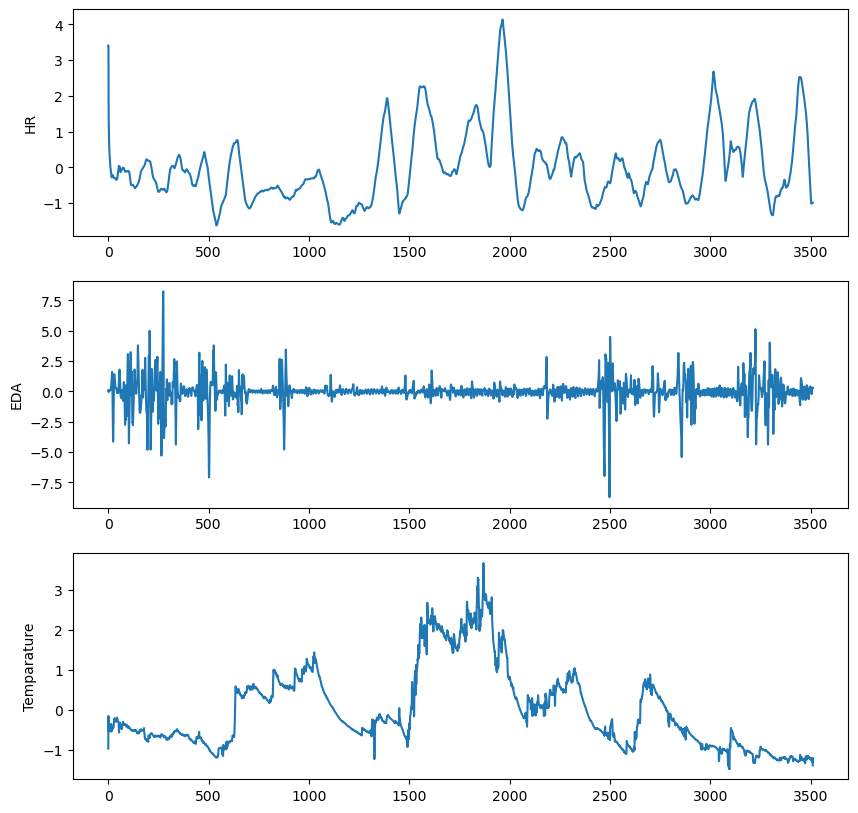

In [20]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Plot the first column
axs[0].plot(scaled_df.index, scaled_df.iloc[:, 0])
axs[0].set_ylabel('HR')

# Plot the second column
axs[1].plot(scaled_df.index, scaled_df.iloc[:, 1])
axs[1].set_ylabel('EDA')

# Plot the third column
axs[2].plot(scaled_df.index, scaled_df.iloc[:, 2])
axs[2].set_ylabel('Temparature')

# Dataset Modeling (LSTM)

In [22]:
scaled_df# dataset after data labelling

,HR.csv,BVP.csv,EDA.csv,TEMP.csv,Label,Participant
0,3.407213,0.098120,-0.967549,1.305783,0,35
1,3.406476,-0.022192,-0.153063,2.606911,1,35
2,1.486082,0.011136,-0.534733,2.250683,1,35
3,1.031147,-0.007611,-0.393840,2.525188,1,35
4,0.738375,0.004498,-0.467180,2.346563,1,35
...,...,...,...,...,...,...
3507,-1.003867,0.106454,-1.278024,-0.430466,0,35
3508,-0.997794,0.282174,-1.218079,-0.351381,0,35
3509,-0.995840,0.322626,-1.303703,-0.495009,0,35
3510,-0.992628,0.253136,-1.193255,-0.293583,0,35


In [23]:
scaler = MinMaxScaler(feature_range=(0, 1))# Initialize the MinMaxScaler with a specified range
columns = ["HR.csv", "EDA.csv", "TEMP.csv"] # Define columns or filenames to be processed
time_series_normalized = []

# Iterate through each column and normalize the data
for col in columns:                
    data = scaled_df[col].values.reshape(-1, 1) # Reshape data for scaler's requirements
    data_normalized = scaler.fit_transform(data) # Normalize the data using the scaler
    time_series_normalized.append(data_normalized) # Add the normalized data to the list

# Combine the normalized time series into a single array
time_series_combined = np.hstack(time_series_normalized)

# Split the data into train and test sets
train_size = int(len(time_series_combined) * 0.67) # Split the data into training and testing sets (67% for training)
train_data, test_data = time_series_combined[:train_size], time_series_combined[train_size:]

# Define a function to transform data into a format suitable for LSTM
def prepare_data(data, look_back=20):
    X, Y = [], []
    for i in range(len(data) - look_back):   # Create sliding window data sequences
        X.append(data[i:(i + look_back)])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

# Prepare the data for LSTM
look_back = 10   # Number of previous time steps as input (can be adjusted based on the problem)
X_train, y_train = prepare_data(train_data, look_back)
X_test, y_test = prepare_data(test_data, look_back)

# Reshape the input data to fit the LSTM format (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], len(columns)))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], len(columns)))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, len(columns))))# LSTM layer with 50 units
model.add(Dense(len(columns)))   # Output layer with same number of neurons as features
model.compile(loss='mean_squared_error', optimizer='adam')# Compile model with MSE loss and Adam optimizer

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predictions to original scale
train_predictions = scaler.inverse_transform(train_predictions)
y_train_original = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test_original = scaler.inverse_transform(y_test)

# Calculate the root mean squared error (RMSE) to evaluate the model's accuracy
train_rmse = np.sqrt(mean_squared_error(y_train_original, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test_original, test_predictions))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Epoch 1/100
2343/2343 - 11s - loss: 0.0022 - 11s/epoch - 5ms/step
Epoch 2/100
2343/2343 - 8s - loss: 6.0425e-04 - 8s/epoch - 4ms/step
Epoch 3/100
2343/2343 - 7s - loss: 3.8465e-04 - 7s/epoch - 3ms/step
Epoch 4/100
2343/2343 - 7s - loss: 2.8725e-04 - 7s/epoch - 3ms/step
Epoch 5/100
2343/2343 - 7s - loss: 2.3017e-04 - 7s/epoch - 3ms/step
Epoch 6/100
2343/2343 - 7s - loss: 1.9108e-04 - 7s/epoch - 3ms/step
Epoch 7/100
2343/2343 - 7s - loss: 1.8150e-04 - 7s/epoch - 3ms/step
Epoch 8/100
2343/2343 - 7s - loss: 1.8119e-04 - 7s/epoch - 3ms/step
Epoch 9/100
2343/2343 - 7s - loss: 1.6568e-04 - 7s/epoch - 3ms/step
Epoch 10/100
2343/2343 - 7s - loss: 1.6145e-04 - 7s/epoch - 3ms/step
Epoch 11/100
2343/2343 - 7s - loss: 1.6189e-04 - 7s/epoch - 3ms/step
Epoch 12/100
2343/2343 - 7s - loss: 1.6105e-04 - 7s/epoch - 3ms/step
Epoch 13/100
2343/2343 - 8s - loss: 1.5161e-04 - 8s/epoch - 3ms/step
Epoch 14/100
2343/2343 - 8s - loss: 1.5391e-04 - 8s/epoch - 3ms/step
Epoch 15/100
2343/2343 - 8s - loss: 1.4511e-0

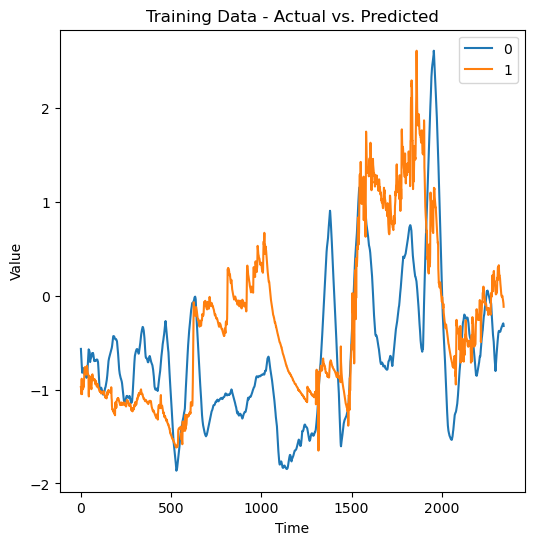

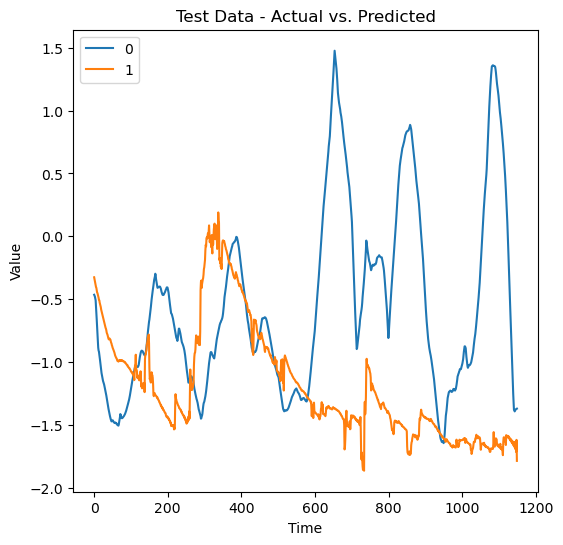

In [24]:
import matplotlib.pyplot as plt

# Combine the original time series data and the predicted values
train_actual_predicted = np.concatenate((y_train_original, train_predictions), axis=1)
test_actual_predicted = np.concatenate((y_test_original, test_predictions), axis=1)

# Create a function to plot the time series data
def plot_time_series(data, title):
    plt.figure(figsize=(6, 6))
    plt.plot(data[:, 0], label='0')
    plt.plot(data[:, 1], label='1')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot the training data
plot_time_series(train_actual_predicted, title='Training Data - Actual vs. Predicted')

# Plot the test data
plot_time_series(test_actual_predicted, title='Test Data - Actual vs. Predicted')